In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data


In [2]:
from scipy.stats import \
    (ttest_1samp,
     ttest_rel,
     ttest_ind,
     t as t_dbn)
from statsmodels.stats.multicomp import \
     pairwise_tukeyhsd
from statsmodels.stats.multitest import \
     multipletests as mult_test


In [5]:
from ISLP.models import (ModelSpec as MS,
summarize , poly)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Exercise 7

In [3]:
car_df = load_data('Carseats')
car_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [19]:
allvars = car_df.select_dtypes(include=np.number)
allvars.drop(columns=['Sales'], inplace=True)
design = MS(allvars)
X = design.fit_transform(car_df)
y = car_df['Sales']
X

,intercept,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1.0,138,73,11,276,120,42,17
1,1.0,111,48,16,260,83,65,10
2,1.0,113,35,10,269,80,59,12
3,1.0,117,100,4,466,97,55,14
4,1.0,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,33,14
396,1.0,139,23,3,37,120,55,11
397,1.0,162,26,12,368,159,40,18
398,1.0,100,79,7,284,95,50,12


In [21]:
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     66.18
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.41e-62
Time:                        15:32:28   Log-Likelihood:                -826.32
No. Observations:                 400   AIC:                             1669.
Df Residuals:                     392   BIC:                             1701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       7.7077      1.118      6.896      0.000       5.510       9.905
CompPrice       0.0939      0.008     11.980      0.000       0.079       0.109
Income          0.0129      0.003      3.703      0.000       0.006       0.020
Advertising     0.1309      0.015      8.654      0.000       0.101       0.161
Population     -0.0001      0.001     -0.180      0.857      -0.001       0.001
Price          -0.0925      0.005    -18.314      0.000      -0.102      -0.083
Age            -0.0450      0.006     -7.485      0.000      -0.057      -0.033
Education      -0.0400      0.037     -1.077      0.282      -0.113       0.033
==============================================================================
Omnibus:                        8.263   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.705
Skew:                           0.288   Prob(JB):                       0.0212
Kurtosis:                       2.639   Cond. No.                     4.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
dir(res)[70:]

['get_robustcov_results',
 'info_criteria',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'params',
 'predict',
 'pvalues',
 'remove_data',
 'resid',
 'resid_pearson',
 'rsquared',
 'rsquared_adj',
 'save',
 'scale',
 'ssr',
 'summary',
 'summary2',
 't_test',
 't_test_pairwise',
 'tvalues',
 'uncentered_tss',
 'use_t',
 'wald_test',
 'wald_test_terms',
 'wresid']

In [42]:
pvls = np.array(res.pvalues)

In [43]:
res.pvalues

intercept      2.145154e-11
CompPrice      2.153866e-28
Income         2.432641e-04
Advertising    1.302560e-16
Population     8.570924e-01
Price          1.409811e-54
Age            4.751078e-13
Education      2.821424e-01
dtype: float64

In [44]:
sorted = np.sort(pvls)

In [45]:
sorted.shape

(8,)

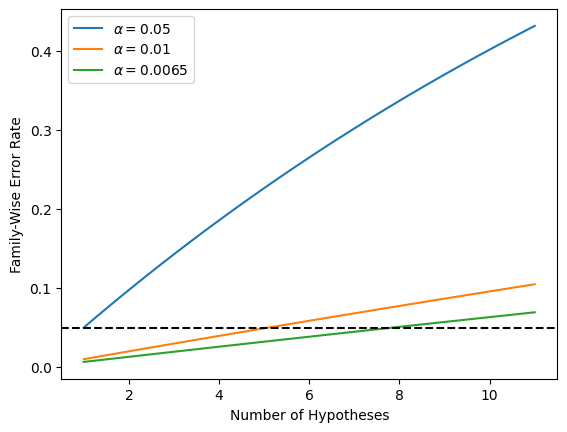

In [56]:
# p value to reject H0 at FWER controlled at alpha 0.05


m = np.linspace(1, 11)
fig, ax = plt.subplots()
[ax.plot(m,
         1 - (1 - alpha)**m,
         label=r'$\alpha=%s$' % str(alpha))
         for alpha in [0.05, 0.01, 0.0065]]
# ax.set_xscale('log')
ax.set_xlabel('Number of Hypotheses')
ax.set_ylabel('Family-Wise Error Rate')
ax.legend()
ax.axhline(0.05, c='k', ls='--');

# from the graph it results that the p value to reject a null hypothesis
# so that the FWER is controlled at 0.05 is 0.0065 (with th 8 hypotheses tested)
p_val = 0.0065

In [60]:
# to keep discoveries:

pvls <= p_val

array([ True,  True,  True,  True, False,  True,  True, False])

In [68]:
res.pvalues[pvls <= p_val]

intercept      2.145154e-11
CompPrice      2.153866e-28
Income         2.432641e-04
Advertising    1.302560e-16
Price          1.409811e-54
Age            4.751078e-13
dtype: float64

In [62]:
res.pvalues

intercept      2.145154e-11
CompPrice      2.153866e-28
Income         2.432641e-04
Advertising    1.302560e-16
Population     8.570924e-01
Price          1.409811e-54
Age            4.751078e-13
Education      2.821424e-01
dtype: float64

In [70]:
fdr_qvalues = mult_test(pvls, method = "fdr_bh")[1]
fdr_qvalues

array([3.43224621e-11, 8.61546288e-28, 3.24352197e-04, 3.47349321e-16,
       8.57092428e-01, 1.12784882e-53, 9.50215507e-13, 3.22448488e-01])

In [71]:
# so then controlling FDR at 0.2 we can reject the following
#  H0 for the predictors, while being fairly confident 
# that only around 20% of the rejected H0s might be false 
# positives (so like max 1-2 of the 6 predictors accepted 
# to be different than 0 might actually be 0)

fdr_qvalues <= 0.2

array([ True,  True,  True,  True, False,  True,  True, False])

In [72]:
res.pvalues[fdr_qvalues <= 0.2]

intercept      2.145154e-11
CompPrice      2.153866e-28
Income         2.432641e-04
Advertising    1.302560e-16
Price          1.409811e-54
Age            4.751078e-13
dtype: float64

So regardless of controlling Type ! error at 0.05; FWER at 0.05 or FDR at 0.2 - in all cases we reject H0 for everything except population and education. All is the same because the p values for the coefficients that have been accepted are REALLY THAT SMALL - all of them are SUPER significant (so no matter if we apply the more stringent confidence of controlling FWER we can still reject all the same H0 for the other predictors)

# Exercise 8

In [74]:
rng = np.random.default_rng(1) 
n, m = 20, 100
X = rng.normal(size=(n, m))

In [76]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.345584,0.821618,0.330437,-1.303157,0.905356,0.446375,-0.536953,0.581118,0.364572,0.294132,...,0.876242,0.256486,-0.094828,-0.258848,1.055743,-2.250854,-0.138655,0.033000,-1.425349,0.332814
1,-0.651281,0.862445,-0.125592,0.669153,1.218844,0.382930,-0.875721,-1.514319,1.753384,-0.111292,...,-0.459072,1.226271,0.962155,-2.711285,0.041703,-1.617467,1.109638,0.168106,0.548405,-1.065125
2,1.828430,2.020073,-1.064771,0.372815,-0.673302,-0.023570,-1.265637,1.867146,-0.969180,-0.296084,...,-0.875422,1.001410,0.144085,0.782085,0.134622,0.262901,-0.782999,0.668047,1.784698,-0.309688
3,-0.592775,-0.157837,-0.481280,-0.701479,0.138194,-0.290918,1.438874,0.000202,0.323912,0.952022,...,0.681968,0.770631,-0.111646,-0.257662,-0.193803,-1.694992,0.188743,0.234578,-0.865529,0.742446
4,-1.372967,-0.551813,-0.475219,1.987510,-1.599184,0.562630,0.942123,0.377726,1.181808,-1.002738,...,-1.182603,0.162277,1.110292,0.271668,0.172856,-0.379214,0.561030,-2.135831,0.232373,0.028126
5,-1.370340,2.175598,-1.387413,-1.077520,-1.200863,1.110368,-0.888085,0.668656,0.587510,0.259670,...,-3.080178,-0.357138,-0.332090,-1.426456,-1.482503,-0.462462,-0.547100,1.259919,0.374863,-1.580855
6,-0.854651,0.705142,1.895977,0.386499,0.310713,1.860752,-0.022671,-0.309101,-1.413249,-0.513016,...,-1.066791,1.033177,0.465109,0.978769,-0.309761,0.563999,-0.730844,-1.371960,-1.694795,-0.551710
7,-0.548941,-0.629377,-3.548805,-1.998604,-0.532632,0.287017,-0.578793,-0.876897,-2.308473,2.021499,...,-1.219819,-0.265092,0.036187,1.368172,1.776935,-0.694593,-1.180284,-1.783845,1.288723,-0.135994
8,-0.697477,-0.101440,-2.608908,-1.776633,0.883802,0.344033,0.098079,-1.053687,0.535345,1.725905,...,0.345903,-0.592976,-0.352377,-0.504329,2.106537,0.191187,0.049320,-2.166612,0.723810,-1.071496
9,-1.142957,0.599558,-0.876409,0.822835,1.108893,-1.802395,-0.149110,-1.586818,-0.074934,0.899198,...,0.951823,0.577532,-0.354330,-0.213398,-0.359092,-0.338785,-2.418499,-0.076199,-0.397134,0.274956


In [81]:
df = pd.DataFrame(X)
np.array(df.mean()).mean()

-0.01339793682807863

In [86]:
p_values = np.empty(100)
for i in range(100):
   p_values[i] = ttest_1samp(X[:,i], 0).pvalue
decision = pd.cut(p_values,
                  [0, 0.05, 1],
                  labels=['RH0',
                          'DNRH0'])

In [92]:
decision = np.array(decision)
decision[decision == 'RH0'].shape
# for a) it happens that we reject 4 out of 100 H0 if we control Type I error at alpha = 0.05 
# so we were wrong JUST ABOUT 5% of the time!!

(4,)

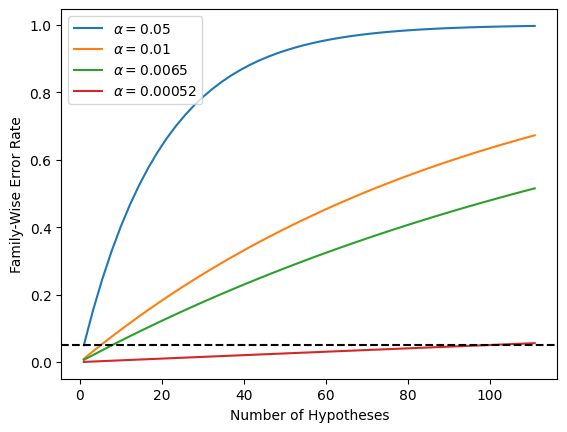

In [95]:
# p value to reject H0 at FWER controlled at alpha 0.05 for m = 100 hypotheses


m = np.linspace(1, 111)
fig, ax = plt.subplots()
[ax.plot(m,
         1 - (1 - alpha)**m,
         label=r'$\alpha=%s$' % str(alpha))
         for alpha in [0.05, 0.01, 0.0065, 0.00052]]
# ax.set_xscale('log')
ax.set_xlabel('Number of Hypotheses')
ax.set_ylabel('Family-Wise Error Rate')
ax.legend()
ax.axhline(0.05, c='k', ls='--');

# from the graph it results that the p value to reject a null hypothesis
# so that the FWER is controlled at 0.05 is 0.00052 (with the 100 hypotheses tested)
p_val = 0.0065

In [99]:
p_values[p_values < 0.00052].shape
# if we control FWER at 0.05 we do not reject any H0j

(0,)

In [103]:
manager_qvalues = mult_test(p_values, method = "fdr_bh")[1]
manager_qvalues
manager_qvalues[manager_qvalues <= 0.05].shape

# apparently also controlling FDR at 0.05 (even though more powerful to reject an H0)
# still comes to the ground truth and fails to reject any H0 (as it should, given all 100 are actually true)

(0,)

In [109]:
sorted_pv = np.sort(p_values)
first_10 = sorted_pv[:10]

In [111]:
# calculated with calculator - p value to control FWER at 0.05 for 10 hypotheses is 0.00512
first_10[first_10 < 0.00512].shape

# see now that WE DID reject 1 H0 (even though WE SHOULD NOT HAVE), 
# even when 'controlling' for FWER at 0.05 - BECAUSE WE CHERRY PICKED 
# and did not take into account the other information we had at our disposal given by the other 
# tests, that the p value of this test might be this small just by chance 
# ALL 100 !!! tests are in the same FAMILY (family wise error rate) - it's not right to just pick the best performers, 
# as we give up valuable information about the significance of the discoveries

(1,)

In [112]:
first_10_manager_qvalues = mult_test(first_10, method = "fdr_bh")[1]
first_10_manager_qvalues
first_10_manager_qvalues[first_10_manager_qvalues <= 0.05].shape

# and 'controlling' FDR at 0.05 for the cherry picked p values we reject 2 (even more wrong!)

(2,)